In [1]:
#Importing the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading our normalised real world data.
data = pd.read_csv('/Users/tamanna/Downloads/NormalisedFilteredGEOROCDatawithoutLabel.csv')
data

,Rock_name,SIO2(WT%),TIO2(WT%),AL2O3(WT%),FEOT(WT%),CAO(WT%),MGO(WT%),MNO(WT%),P2O5(WT%),K2O(WT%),NA2O(WT%),Na2O+K2O,Na2O+K2O/SiO2
0,Andesite,62.907595,0.471556,16.955955,4.414568,5.327581,3.401224,0.050166,0.431424,1.575198,4.464734,6.039932,0.096013
1,Andesite,62.299679,0.761218,16.927083,4.326923,5.839343,3.365385,0.070112,0.350561,1.872997,4.186699,6.059696,0.097267
2,Andesite,62.908250,0.803939,17.083710,5.466787,5.125113,2.240981,0.050246,0.291428,1.688273,4.341272,6.029545,0.095847
3,Andesite,61.201966,0.732417,16.855624,5.157018,6.340925,3.451390,0.060199,0.561854,1.344437,4.294171,5.638607,0.092131
4,Andesite,57.339788,0.879096,17.892011,7.921076,6.988763,3.114190,0.145322,0.294738,1.841087,3.583929,5.425016,0.094612
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67175,Trachyte,60.803138,0.320017,17.549293,7.174564,1.775576,0.412925,0.206462,0.113554,4.469908,7.174564,11.644472,0.191511
67176,Trachyte,60.289885,0.627056,21.011513,2.919408,2.168997,0.493421,0.185033,0.092516,4.697780,7.514391,12.212171,0.202558
67177,Trachyte,62.084927,0.231435,20.124774,2.445160,1.006239,0.100624,0.442745,0.030187,5.584625,7.949286,13.533910,0.217990
67178,Trachyte,61.612806,0.463103,18.926810,2.990033,2.818887,0.402698,0.221484,0.070472,5.748515,6.745193,12.493708,0.202778


In [3]:
#Counting the number of samples for each rock type.
rock_type_column = 'Rock_name'  
sample_counts = data[rock_type_column].value_counts()
sample_counts

Rock_name
Basalt               29957
Rhyolite             11116
Andesite             11095
Dacite                5643
Basaltic_andesite     4030
Trachybasalt           997
Trachyte               952
Basanite               941
Trachyandesite         800
Phonolite              725
Trachydacite           293
Phonotephrite          232
Tephrite               145
Picrobasalt            136
Foidite                118
Name: count, dtype: int64

In [4]:
#Defining the threshold for the rock types with less number of samples.
threshold = 10000
fake_data = [] #Creating an empty list.

#Looping through each rock type and create fake data for underrepresented types.
for rock_type, count in sample_counts.items():
    if count < threshold:
        rock_data = data[data[rock_type_column] == rock_type]
        oxide_columns = rock_data.columns[1:]  
        rock_data_transformed = np.log1p(rock_data[oxide_columns]) #Log-transforming to reduce skewness and normalize distributions).
        cov_matrix = rock_data_transformed.cov() #Calculating covariance matrix  for correlation structure.
        mean_vector = rock_data_transformed.mean() #Calculateing mean vector for correlation structure.
        n_new_samples = threshold - count #Subtracting the already exisiting samples from the threshold value.
        #Creating fake data using multivariate normal distribution.
        fake_transformed = np.random.multivariate_normal(mean_vector, cov_matrix, size=n_new_samples)
        #Reversing log-transform to return to original scale.
        fake_original_scale = np.expm1(fake_transformed)
        fake_rock_data = pd.DataFrame(fake_original_scale, columns=oxide_columns)
        fake_rock_data[rock_type_column] = rock_type 
        fake_data.append(fake_rock_data)

In [5]:
#Combining all fake data
fake_data = pd.concat(fake_data, ignore_index=True)
fake_data


,SIO2(WT%),TIO2(WT%),AL2O3(WT%),FEOT(WT%),CAO(WT%),MGO(WT%),MNO(WT%),P2O5(WT%),K2O(WT%),NA2O(WT%),Na2O+K2O,Na2O+K2O/SiO2,Rock_name
0,63.948483,0.401004,14.563592,5.409862,6.077681,2.626466,0.193955,0.193287,3.296257,2.902127,5.978044,0.096610,Dacite
1,65.306816,0.761300,14.448219,5.646875,4.237679,1.843049,0.101845,0.368808,2.844882,2.808337,5.791141,0.094108,Dacite
2,67.803084,0.614656,15.128033,4.843161,3.984106,2.458302,0.128585,0.227687,1.164649,1.701224,3.375062,0.054674,Dacite
3,69.526619,0.625359,15.226437,4.393261,2.097808,0.878528,0.155351,0.309564,1.427252,3.742203,5.938031,0.086471,Dacite
4,66.189855,0.701391,16.531193,4.043735,2.949320,1.918231,0.055069,0.185697,3.294006,4.402969,7.661335,0.113095,Dacite
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104983,41.851412,4.115717,13.354750,14.944515,7.967727,8.604703,0.219642,0.777966,2.172407,3.328177,6.647595,0.177481,Foidite
104984,41.631123,2.341525,12.322792,12.602323,10.901585,8.496973,0.155836,1.058029,2.119952,3.301589,7.089486,0.178290,Foidite
104985,39.799594,3.247029,10.100707,14.830069,13.666013,13.481154,0.196749,0.825684,0.454254,4.851649,4.195298,0.104565,Foidite
104986,39.400519,4.244556,13.626785,13.418118,11.656865,7.264465,0.230405,1.476267,1.475786,8.278642,6.746636,0.185347,Foidite


# Density plots to visualise the distribution of both real and fake data.

/var/folders/3l/np31qp4n0g59b3xpdwrb06880000gn/T/ipykernel_23873/2327515474.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(real_data[oxide], label='Real Data', shade=True, color='blue')
/var/folders/3l/np31qp4n0g59b3xpdwrb06880000gn/T/ipykernel_23873/2327515474.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fake_only[oxide], label='Fake Data', shade=True, color='orange')


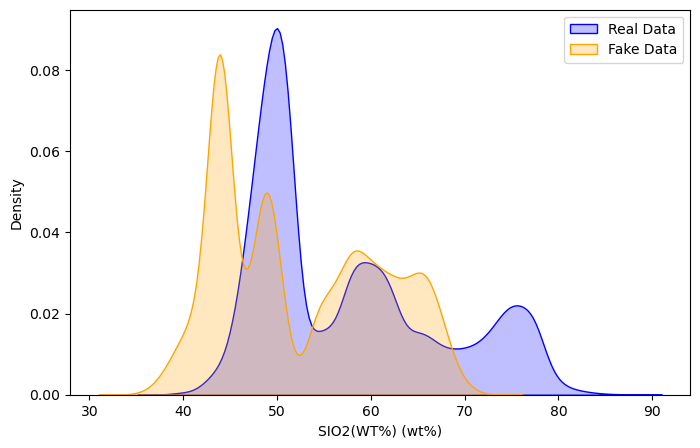

/var/folders/3l/np31qp4n0g59b3xpdwrb06880000gn/T/ipykernel_23873/2327515474.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(real_data[oxide], label='Real Data', shade=True, color='blue')
/var/folders/3l/np31qp4n0g59b3xpdwrb06880000gn/T/ipykernel_23873/2327515474.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fake_only[oxide], label='Fake Data', shade=True, color='orange')


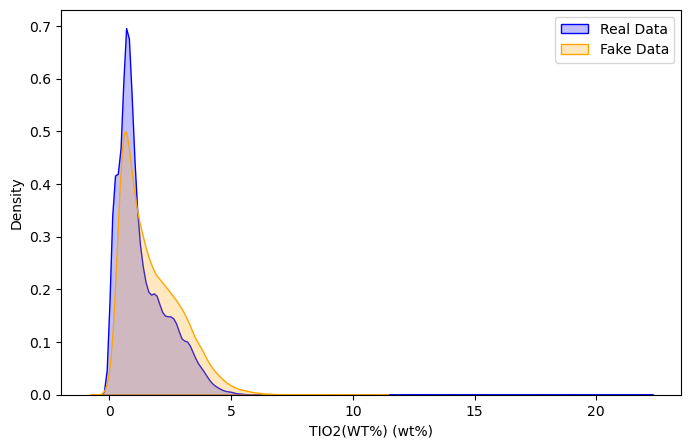

/var/folders/3l/np31qp4n0g59b3xpdwrb06880000gn/T/ipykernel_23873/2327515474.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(real_data[oxide], label='Real Data', shade=True, color='blue')
/var/folders/3l/np31qp4n0g59b3xpdwrb06880000gn/T/ipykernel_23873/2327515474.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fake_only[oxide], label='Fake Data', shade=True, color='orange')


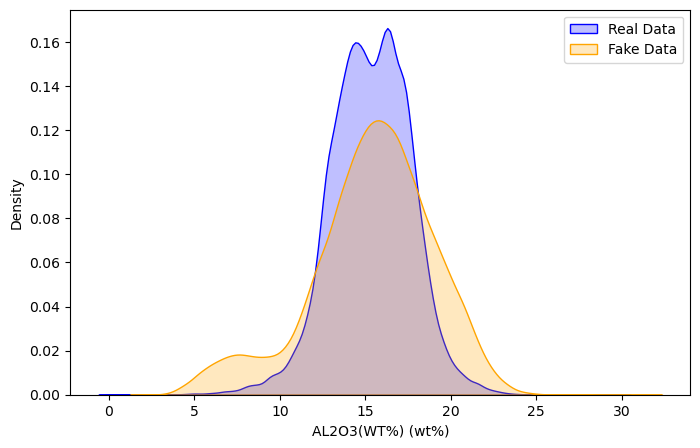

/var/folders/3l/np31qp4n0g59b3xpdwrb06880000gn/T/ipykernel_23873/2327515474.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(real_data[oxide], label='Real Data', shade=True, color='blue')
/var/folders/3l/np31qp4n0g59b3xpdwrb06880000gn/T/ipykernel_23873/2327515474.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fake_only[oxide], label='Fake Data', shade=True, color='orange')


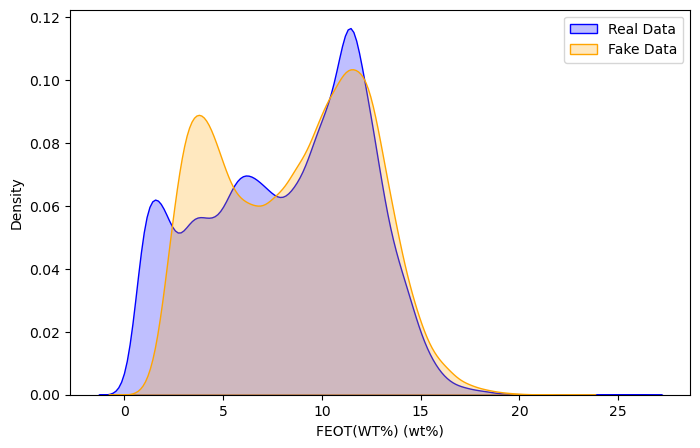

/var/folders/3l/np31qp4n0g59b3xpdwrb06880000gn/T/ipykernel_23873/2327515474.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(real_data[oxide], label='Real Data', shade=True, color='blue')
/var/folders/3l/np31qp4n0g59b3xpdwrb06880000gn/T/ipykernel_23873/2327515474.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fake_only[oxide], label='Fake Data', shade=True, color='orange')


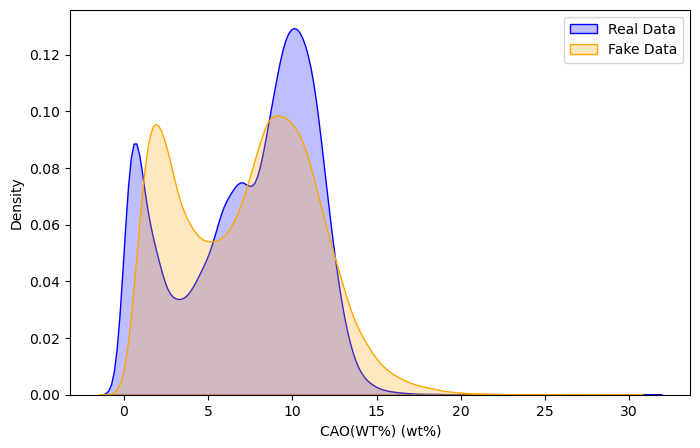

/var/folders/3l/np31qp4n0g59b3xpdwrb06880000gn/T/ipykernel_23873/2327515474.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(real_data[oxide], label='Real Data', shade=True, color='blue')
/var/folders/3l/np31qp4n0g59b3xpdwrb06880000gn/T/ipykernel_23873/2327515474.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fake_only[oxide], label='Fake Data', shade=True, color='orange')


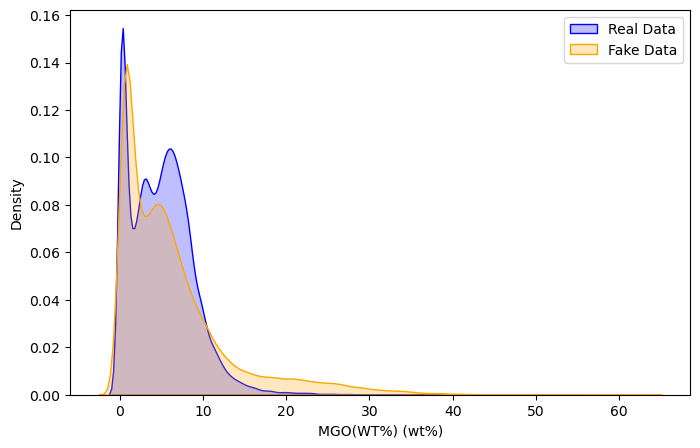

/var/folders/3l/np31qp4n0g59b3xpdwrb06880000gn/T/ipykernel_23873/2327515474.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(real_data[oxide], label='Real Data', shade=True, color='blue')
/var/folders/3l/np31qp4n0g59b3xpdwrb06880000gn/T/ipykernel_23873/2327515474.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fake_only[oxide], label='Fake Data', shade=True, color='orange')


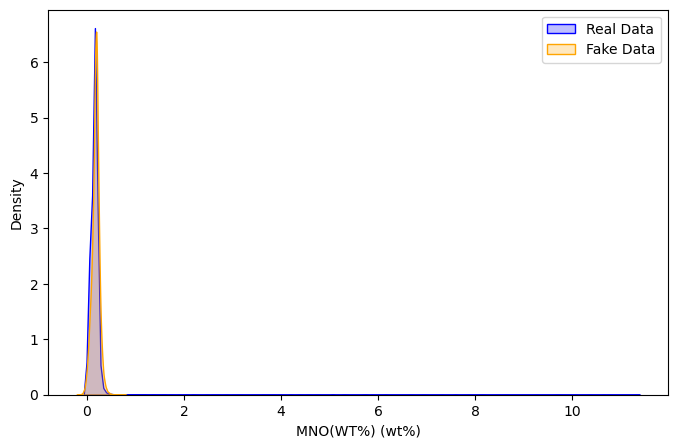

/var/folders/3l/np31qp4n0g59b3xpdwrb06880000gn/T/ipykernel_23873/2327515474.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(real_data[oxide], label='Real Data', shade=True, color='blue')
/var/folders/3l/np31qp4n0g59b3xpdwrb06880000gn/T/ipykernel_23873/2327515474.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fake_only[oxide], label='Fake Data', shade=True, color='orange')


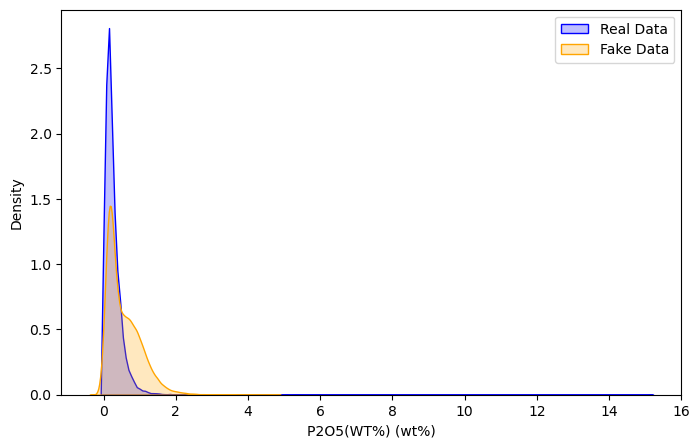

/var/folders/3l/np31qp4n0g59b3xpdwrb06880000gn/T/ipykernel_23873/2327515474.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(real_data[oxide], label='Real Data', shade=True, color='blue')
/var/folders/3l/np31qp4n0g59b3xpdwrb06880000gn/T/ipykernel_23873/2327515474.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fake_only[oxide], label='Fake Data', shade=True, color='orange')


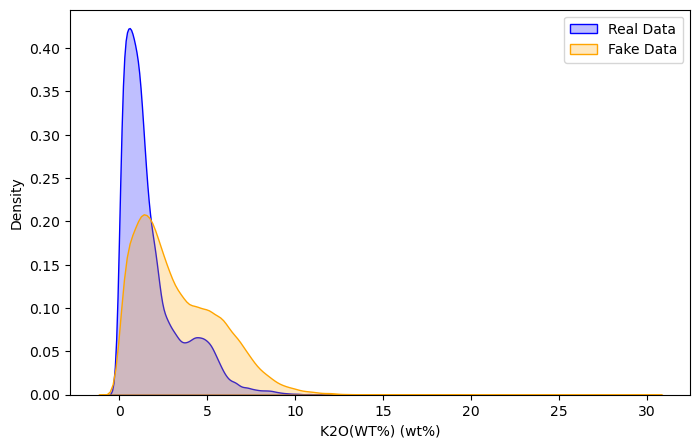

/var/folders/3l/np31qp4n0g59b3xpdwrb06880000gn/T/ipykernel_23873/2327515474.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(real_data[oxide], label='Real Data', shade=True, color='blue')
/var/folders/3l/np31qp4n0g59b3xpdwrb06880000gn/T/ipykernel_23873/2327515474.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fake_only[oxide], label='Fake Data', shade=True, color='orange')


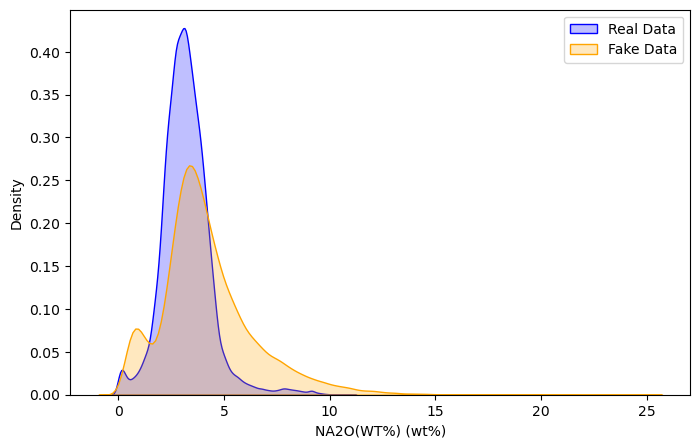

/var/folders/3l/np31qp4n0g59b3xpdwrb06880000gn/T/ipykernel_23873/2327515474.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(real_data[oxide], label='Real Data', shade=True, color='blue')
/var/folders/3l/np31qp4n0g59b3xpdwrb06880000gn/T/ipykernel_23873/2327515474.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fake_only[oxide], label='Fake Data', shade=True, color='orange')


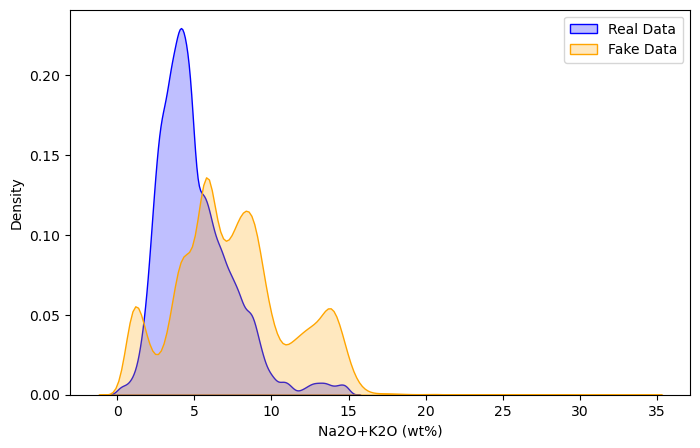

/var/folders/3l/np31qp4n0g59b3xpdwrb06880000gn/T/ipykernel_23873/2327515474.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(real_data[oxide], label='Real Data', shade=True, color='blue')
/var/folders/3l/np31qp4n0g59b3xpdwrb06880000gn/T/ipykernel_23873/2327515474.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fake_only[oxide], label='Fake Data', shade=True, color='orange')


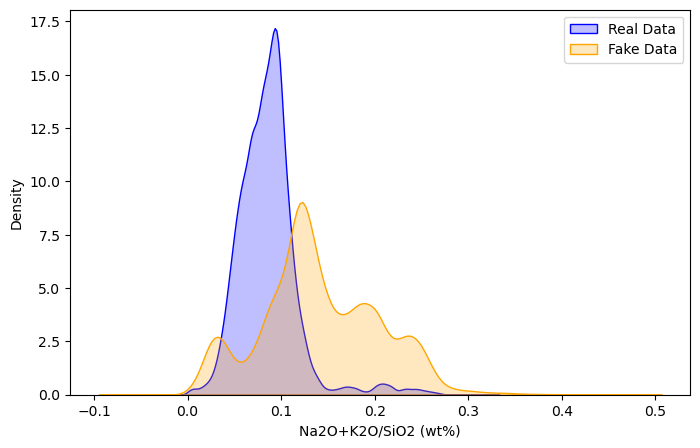

In [6]:
fake_only =fake_data.copy()
real_data = data.copy()
oxide_columns = [col for col in real_data.columns if col != rock_type_column]
for oxide in oxide_columns:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(real_data[oxide], label='Real Data', shade=True, color='blue')
    sns.kdeplot(fake_only[oxide], label='Fake Data', shade=True, color='orange')
    plt.xlabel(f"{oxide} (wt%)")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# Correlation Matrices of both real and fake data

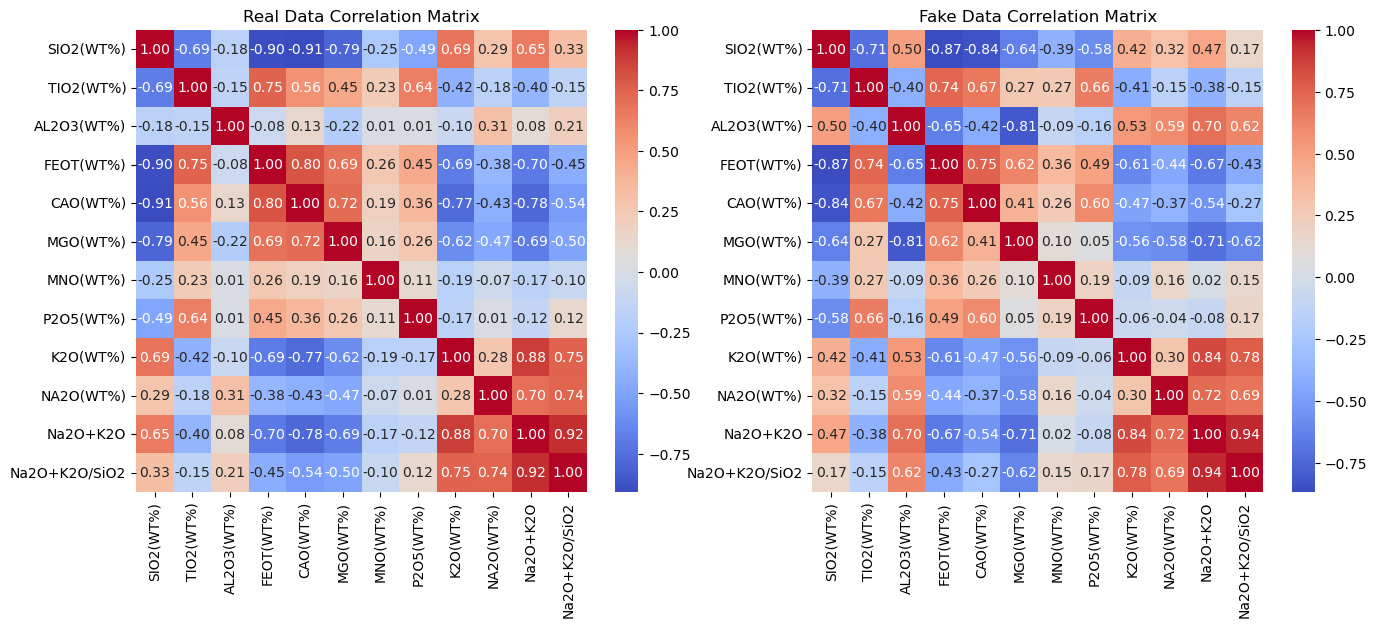

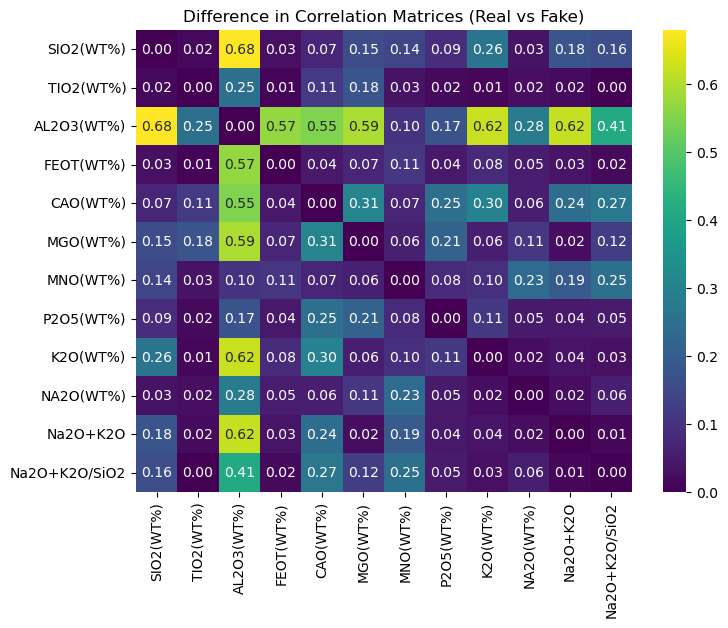

Mean Absolute Difference in Correlations: 0.1415


In [7]:
oxide_columns = [col for col in data.columns if col != rock_type_column]
#Correlation matrices.
real_corr = real_data[oxide_columns].corr()
fake_corr = fake_only[oxide_columns].corr()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(real_corr, ax=axes[0], cmap="coolwarm", annot=True, fmt=".2f")
axes[0].set_title("Real Data Correlation Matrix")

sns.heatmap(fake_corr, ax=axes[1], cmap="coolwarm", annot=True, fmt=".2f")
axes[1].set_title("Fake Data Correlation Matrix")

plt.show()

diff_corr = np.abs(real_corr - fake_corr)  
plt.figure(figsize=(8, 6))
sns.heatmap(diff_corr, cmap="viridis", annot=True, fmt=".2f")
plt.title("Difference in Correlation Matrices (Real vs Fake)")
plt.show()

mean_diff = diff_corr.mean().mean()
print(f"Mean Absolute Difference in Correlations: {mean_diff:.4f}")
